# <center>CHE1147 Data Mining in Engineering</center>

## <center>Assignment 2</center>


#### <div style="text-align: right">Bowen Xu</div>
#### <div style="text-align: right">1006411786</div>    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
df = pd.read_excel('phone_data.xlsx')
df

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00


## 1. Criminal Investigation

### 1.2 Most and least frequent outgoing numbers

##### &emsp;&emsp;&emsp; - 1. Identify the 3 numbers with the most <b>counts</b> of outgoing calls.

In [3]:
df[df['Call type']=='Outgoing']['Number called (to/from)'].value_counts()[:3].rename_axis('Number Called').reset_index(name='Counts')

,Number Called,Counts
0,A_1,111
1,A_5,48
2,B_3,28


##### &emsp;&emsp;&emsp; - 2. Identify the numbers with the least <b>counts</b> of outgoing calls.  If there are ties (e.g.  1 phone call for many numbers) then identify all numbers.

In [4]:
least3 = np.unique(df[df['Call type']=='Outgoing']['Number called (to/from)'].value_counts(ascending=True).values)[0]
df[df['Call type']=='Outgoing']['Number called (to/from)'].value_counts().loc[lambda x : x==least3].rename_axis('Number Called').reset_index(name='Counts')

,Number Called,Counts
0,C_1,1
1,D_5,1
2,G_2,1
3,E_5,1
4,D_1,1
5,F_5,1
6,B_5,1
7,F_1,1
8,F_4,1
9,E_4,1


### 1.3 Highest and lowest total duration of outgoing calls

##### &emsp;&emsp;&emsp; - 1. Repeat the same exercise as in the previous subsection, but with the total <b>duration per number</b> called.

In [5]:
df[df['Call type']=='Outgoing'].groupby('Number called (to/from)')['Duration'].sum().sort_values(ascending=False)[:3].rename_axis('Number Called').reset_index(name='Total Duration')

,Number Called,Total Duration
0,A_1,1146
1,A_5,427
2,A_4,96


In [6]:
least3_2 = np.unique(df[df['Call type']=='Outgoing'].groupby('Number called (to/from)')['Duration'].sum().sort_values(ascending=False))[0]
df[df['Call type']=='Outgoing'].groupby('Number called (to/from)')['Duration'].sum().sort_values().loc[lambda x : x==least3_2].rename_axis('Number Called').reset_index(name='Total Duration')

,Number Called,Total Duration
0,E_5,1
1,E_4,1
2,D_5,1
3,C_1,1


### 1.4 Location of outgoing calls

##### &emsp;&emsp;&emsp; - 1. What are the number of <b>counts</b> for every location of outgoing calls?

<div style='color:purple'> Both the origins and destinations of the phone call are showed below, the destinations are clearly more diversifed than the origins. However, during a criminal investigation, police may care more about the origins of the phone call since they want to know where are the areas that always have criminal activities.

In [7]:
df[df['Call type']=='Outgoing']['From city'].value_counts().rename_axis('Locations').reset_index(name='Counts')

,Locations,Counts
0,TORONTO ON,244
1,NEWMARKET ON,2
2,CLAREMONT ON,1


In [8]:
df[df['Call type']=='Outgoing']['To city'].value_counts().rename_axis('Locations').reset_index(name='Counts')

,Locations,Counts
0,TORONTO ON,199
1,OAK RIDGES ON,28
2,RICHMONDHL ON,10
3,THORNHILL ON,3
4,800 SERV SERV 800 ON,1
5,AURORA ON,1
6,888 SERV SERV 888 ON,1
7,866 SERV SERV 866 ON,1
8,NEWMARKET ON,1
9,877 SERV SERV 877 ON,1


### 1.5 Incoming and Outgoing calls pattern

##### &emsp;&emsp;&emsp; - 1. Calculate the <b>total duration</b> of incoming and outgoing calls per month.

In [9]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [10]:
temp = df[df['Call type']=='Outgoing'].groupby('Month')['Duration'].sum().rename_axis('Month').reset_index(name='Outgoing Total Duration')
temp['Incoming Total Duration'] = df[df['Call type']=='Incoming'].groupby('Month')['Duration'].sum().values
temp

,Month,Outgoing Total Duration,Incoming Total Duration
0,7,190,84
1,8,281,54
2,9,714,244
3,10,621,63
4,11,196,87


##### &emsp;&emsp;&emsp; - 2. Plot the results in one graph for both incoming and outgoing calls.

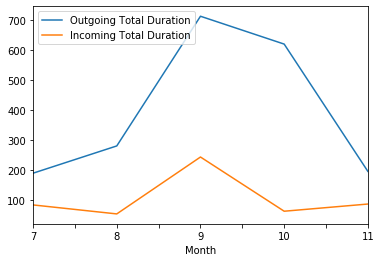

In [12]:
temp['Month'] = temp['Month'].astype(str)
temp.plot.line(x='Month')
# plt.savefig('Q1_5_2.png')

##### &emsp;&emsp;&emsp; - 3. Do you see anything unusual in the pattern?  E.g.  does this look like a phone line thatwas used for criminal activities or more like a personal phone?

<div style='color:purple'> By looking at he graph above, we can clearly see that total outgoing duration is much bigger than the incoming ones. Total duration is not enough to indicate whether this is a criminal or personal line since most of the duration is dominated by A_1, A_5 and A_4 according to the table shown above this question, and these numbers have the most frequent calls during these 5 months. However, there a common peak in Sepetember for both outgoing and incoming duration which may indicate this is a personal phone for salespeople: Sepetember is the last quarter of the year and salespeople want to provide more promotions in order to increase their sales and boost their performance before a new fiscal year, therefore, they got higher amount of outgoing or incoming phones to/from customers who want to buy promoted products. This is unlikely to be a criminal phone since it always be random and can't get peaks at the same time period of the year...

### 1.6 Distribution of calls

##### &emsp;&emsp;&emsp; - 1. Plot the histogram of the <b>outbound call counts</b>;  e.g.  x-axis:  the call counts per client called, y-axis:  number of clients called.

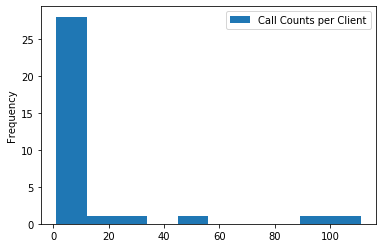

In [14]:
df.groupby('Number called (to/from)').size().rename_axis('Number').reset_index(name='Call Counts per Client').plot.hist()
# plt.savefig('Q1_6_1.png')

## 2. The ergodicity problem in economics

### 2.3 Coding the Problem

##### &emsp;&emsp;&emsp; - 1. Generate a pandas dataframe that simulates <b>N</b> coin tosses for <b>w</b> gamblers with the np.random.rand function.  Set <b>N</b>=100 coin tosses and <b>w</b>=100 gamblers and add theprefix ’prob’ to the column name.

##### &emsp;&emsp;&emsp; - 2. Initialize an additional <b>w</b> columns [’balance_’ + str(x)] with the value 100 to capture the initial wealth of 100, where:  x in range(0, w)


<div style='color:purple'> I combined 1 and 2 into a function called initialize_table for the below questions' convenience

In [15]:
def initialize_table(N, w):
    df_prob = pd.DataFrame(np.random.rand(N,w)).add_prefix('prob_')
    for x in range(0,w):
        df_prob['balance_'+str(x)] = 0
        df_prob.loc[0,'balance_'+str(x)] = 100 #add initial $100 to the first row
    return df_prob

In [16]:
N = 100
w = 100

In [17]:
df_prob1 = initialize_table(N,w)
df_prob1

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442,...,100,100,100,100,100,100,100,100,100,100
1,0.677817,0.270008,0.735194,0.962189,0.248753,0.576157,0.592042,0.572252,0.223082,0.952749,...,0,0,0,0,0,0,0,0,0,0
2,0.311796,0.696343,0.377752,0.179604,0.024679,0.067250,0.679393,0.453697,0.536579,0.896671,...,0,0,0,0,0,0,0,0,0,0
3,0.906555,0.774047,0.333145,0.081101,0.407241,0.232234,0.132488,0.053427,0.725594,0.011427,...,0,0,0,0,0,0,0,0,0,0
4,0.401260,0.929291,0.099615,0.945302,0.869489,0.454162,0.326701,0.232744,0.614465,0.033075,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.029929,0.985128,0.094747,0.450997,0.838719,0.421550,0.248752,0.414002,0.823889,0.044891,...,0,0,0,0,0,0,0,0,0,0
96,0.616935,0.202908,0.288809,0.445060,0.547227,0.175374,0.595522,0.607244,0.408535,0.200720,...,0,0,0,0,0,0,0,0,0,0
97,0.891112,0.268674,0.840285,0.757010,0.995391,0.163374,0.897394,0.056980,0.673065,0.669158,...,0,0,0,0,0,0,0,0,0,0
98,0.269698,0.738825,0.807145,0.200596,0.308739,0.008721,0.384833,0.901115,0.401340,0.759015,...,0,0,0,0,0,0,0,0,0,0


##### &emsp;&emsp;&emsp; - 3.  Create a two-level for loop that iterates through rows 1 to N first and columns w to 2×w next implementing the calculation logic for every prob-balance pair:

$$
Balance^i=\begin{equation}
\left\{ 
  \begin{aligned}
    1.5 \times Balance^{i-1}, \text{if}\; prob^{i-1}\geq0.5\\
    0.6 \times Balance^{i-1}, \text{if}\; prob^{i-1}\lt0.5\\
  \end{aligned}
  \right.
\end{equation}
$$

In [18]:
def logic1(df_prob, N, w):
    for i in range(1,N):
        for j in range(w,2*w):
            prob = df_prob.iloc[i-1,j-w]
            if prob >= 0.5:
                df_prob.iloc[i,j] = 1.5 * df_prob.iloc[i-1,j]
            elif prob < 0.5:
                df_prob.iloc[i,j] = 0.6 * df_prob.iloc[i-1,j]
    return df_prob

##### &emsp;&emsp;&emsp; - 4. Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculate how  many  gamblers  have <b>more</b> than  their  initial  100$.   What  happens  when  you increase <b>N</b> to 1,000 (Figure 2 in the original paper, except the red and blue line)?  How many gamblers with more than 100\$ do you have at t=1,000?


<div style='color:purple'>When t=100, there are 8 gamblers who have more money than their intial 100$, but it becomes 0 (no one get wealth above 100) when t=1000.

8

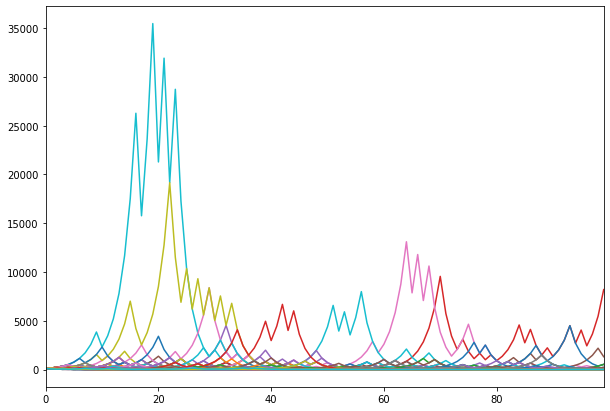

In [20]:
#N=100
df_prob1 = logic1(df_prob1,N,w)

df_prob1.iloc[:,w:].plot.line(legend=None,figsize=(10,7))
# plt.savefig('Q2_3_4_N=100.png')

(df_prob1.iloc[N-1,w:]>100).sum() # number of gamblers have more than their intial $100

0

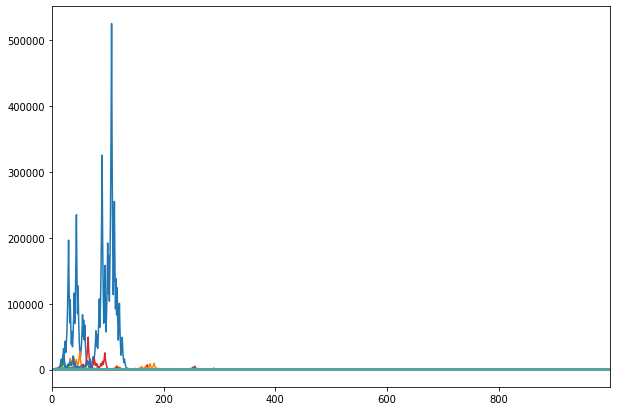

In [22]:
# N = 1000
N, w = 1000, 100
df_prob2 = logic1(initialize_table(N,w),N,w)
df_prob2.iloc[:,w:].plot.line(legend=None,figsize=(10,7))
# plt.savefig('Q2_3_4_N=1000.png')
(df_prob2.iloc[N-1,w:]>100).sum()  # number of gamblers have more than their intial $1000

##### &emsp;&emsp;&emsp; - 5. Plot the time trajectories of the <b>mean</b> and <b>median</b> wealth at every time point from 0 to 1,000.  Try both linear and logarithmic scaler for the wealth axis.  What are your observations?

<div style='color:purple'> 

By looking at the graphs, we can clearly see both the mean and median are decreasing as the number of tosses increases.
    
    
    
By comparing the linear scale and log scale, we can clearly see that both the mean and median have heavy-tailed distribution, i.e. some small values are spread out to the right tail and large values are compressed at the left; on the other hand, log scale stablizes the noises in the distribution and transforms it into a more linear relationship since the variance does not depend on the mean in log scale. 
    
    
Clearly, linear scale includes a lot noises since some people may earn very much money but others may lose a lot of money, therefore, the outliers may induce many fluctuations in the mean graph but the median grpah is much smoother. Log scale makes the decreasing trend be more obvious and median is still smoother than the mean.

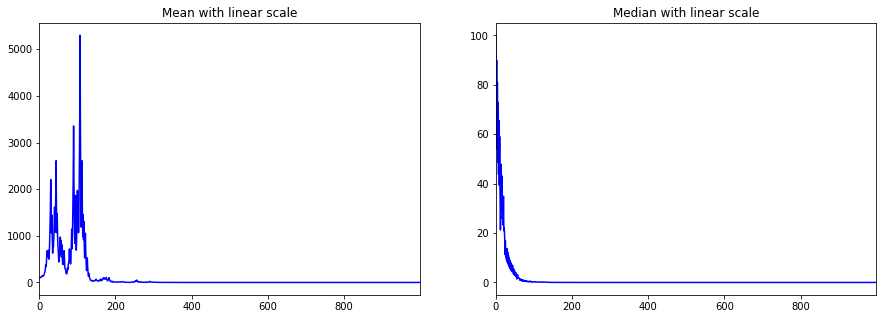

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_prob2.iloc[:,w:].mean(axis=1).plot.line(color='b')
plt.title('Mean with linear scale')

plt.subplot(1,2,2)
df_prob2.iloc[:,w:].median(axis=1).plot.line(color='b')
plt.title('Median with linear scale')
# plt.savefig('Q2_3_5_linear.png')
plt.show()

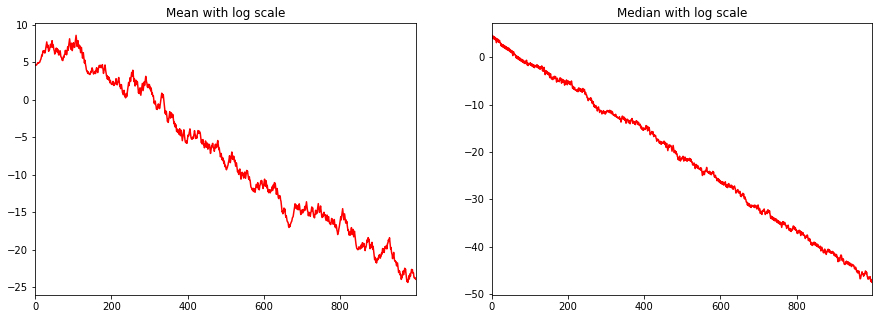

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
np.log(df_prob2.iloc[:,w:].mean(axis=1)).plot.line(color='r')
plt.title('Mean with log scale')

plt.subplot(1,2,2)
np.log(df_prob2.iloc[:,w:].median(axis=1)).plot.line(color='r')
plt.title('Median with log scale')
# plt.savefig('Q2_3_5_log.png')
plt.show()

##### &emsp;&emsp;&emsp; - 6. Repeat steps 3-5 with <b>N</b>=10 and <b>w</b>=1,000 with the following logic:

$$
Balance^i=\begin{equation}
\left\{ 
  \begin{aligned}
    Balance^{i-1} + 50, \text{if}\; prob^{i-1}\geq0.5\\
    Balance^{i-1} - 40, \text{if}\; prob^{i-1}\lt0.5\\
  \end{aligned}
  \right.
\end{equation}
$$

##### &emsp;&emsp;&emsp;&emsp;&emsp; How are the results different than the previous logic?


<div style='color:purple'> 

The time trajectories from logic2 show more overlepping instead of fluctuations and more than half of the 1000 people have the final wealth higher than 100 (initial wealth) which means most of them are winning after 10 tosses. Furthermore, The mean and median graphs for both linear and log scale from logic2 look very similar which means there are less fluctuations, this could be due to a low sample size of the tosses. By comparing the trend of mean and median graphs for both logics, we can clearly see logic2 has a positive trend while logic1 has a negative one which matches the result from time trajectories for each gambler.
    

The reason behind this could be: logic1 has percentages of reward and penalty and final result will converge to a ratio of 0.9 in the long term which will never be higher than the initial wealth, however, logic2 has actual number of reward and penalty and reward is always higher than the penalty.

In [27]:
def logic2(df_prob, N, w):
    for i in range(1,N):
        for j in range(w,2*w):
            prob = df_prob.iloc[i-1,j-w]
            if prob >= 0.5:
                df_prob.iloc[i,j] = df_prob.iloc[i-1,j] + 50
            elif prob < 0.5:
                df_prob.iloc[i,j] = df_prob.iloc[i-1,j] - 40
    return df_prob

In [28]:
N, w = 10, 1000
df_prob3 = logic2(initialize_table(N,w),N,w)

531

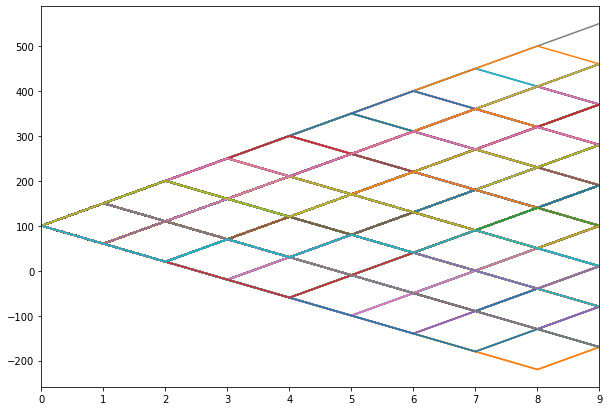

In [30]:
df_prob3.iloc[:,w:].plot.line(legend=None,figsize=(10,7))
# plt.savefig('Q2_3_6_N=1000.png')
(df_prob3.iloc[N-1,w:]>100).sum()

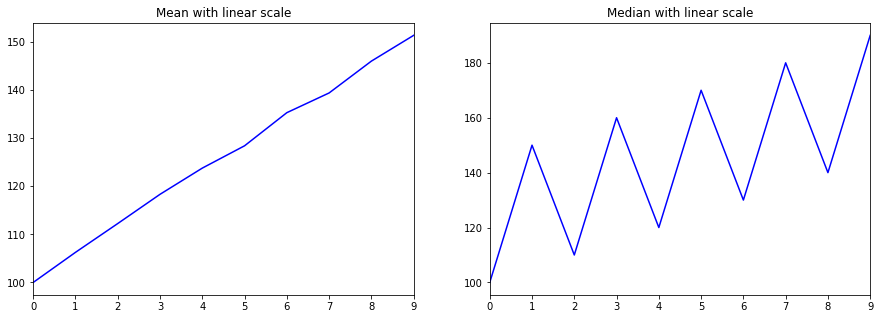

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_prob3.iloc[:,w:].mean(axis=1).plot.line(color='b')
plt.title('Mean with linear scale')


plt.subplot(1,2,2)
df_prob3.iloc[:,w:].median(axis=1).plot.line(color='b')
plt.title('Median with linear scale')
# plt.savefig('Q2_3_6_linear.png')
plt.show()

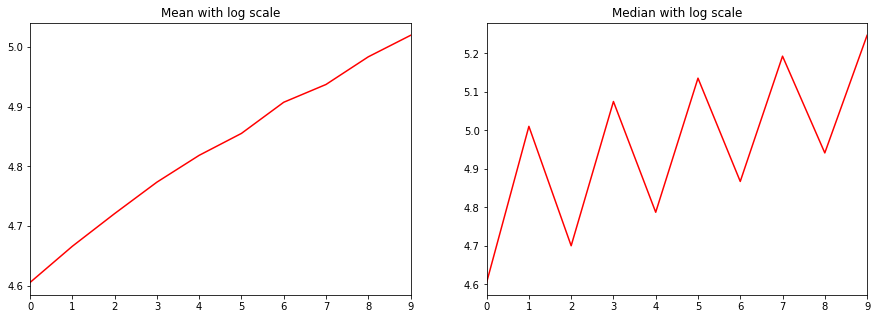

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
np.log(df_prob3.iloc[:,w:].mean(axis=1)).plot.line(color='r')
plt.title('Mean with log scale')

plt.subplot(1,2,2)
np.log(df_prob3.iloc[:,w:].median(axis=1)).plot.line(color='r')
plt.title('Median with log scale')
# plt.savefig('Q2_3_6_log.png')
plt.show()